<a href="https://colab.research.google.com/github/kapilbakshi/dataeng/blob/main/Praxis_DDos2024_Xtree_Model_0118_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kapil Bakshi
Praxis Code for DDoS2024 dataset
This code is for Step 1 of 6
Step 1 is download the dataset and perform EDA

1.1 Download dataset
Download dataset from https://www.yorku.ca/research/bccc/ucs-technical/cybersecurity-datasets-cds/
approx 700K records

1.2 Perform Exploratory Data Analysis (EDA)
Using pandas, ingest dataset and perform EDA to understand data structure and characteristics.
Gather statistics on dataset (i.e., mean, distribution), identify missing or null values.
Identify patterns and outliers using boxplots, charts, heatmaps and other visualizations.
Using matplotlib and SNS, generate data visualizations to present data characteristics.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


import os
import inspect
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks
#data_testing = pd.read_csv('data/labelled_testing_data.csv',sep=',')

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('data/merged_CSVs.csv', low_memory = False)

In [ ]:
df.shape
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
#print("Number of Elements:", df.shape[0] * df.shape[1])
df.head(10)

Number of Rows: 700776
Number of Columns: 324


,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
0,35.203.211.133_54573_10.0.4.57_25094_TCP_2023-...,2023-12-14 09:01:03.508091,35.203.211.133,54573,10.0.4.57,25094,TCP,6.29425048828125e-05,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Benign,Benign
1,10.0.4.57_25094_35.203.211.133_54573_TCP_2023-...,2023-12-14 09:01:03.508156,10.0.4.57,25094,35.203.211.133,54573,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,35.203.211.133_54573_10.0.4.57_25094_TCP_2023-...,2023-12-14 09:01:03.508431,35.203.211.133,54573,10.0.4.57,25094,TCP,2.813339233398437e-05,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,162.142.125.181_9147_10.0.4.57_18060_TCP_2023-...,2023-12-14 09:01:06.696817,162.142.125.181,9147,10.0.4.57,18060,TCP,5.507469177246094e-05,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Benign,Benign
4,10.0.4.57_18060_162.142.125.181_9147_TCP_2023-...,2023-12-14 09:01:06.696874,10.0.4.57,18060,162.142.125.181,9147,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
5,162.142.125.181_9147_10.0.4.57_18060_TCP_2023-...,2023-12-14 09:01:06.697152,162.142.125.181,9147,10.0.4.57,18060,TCP,2.408027648925781e-05,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
6,222.140.175.48_5121_10.0.2.40_23_TCP_2023-12-1...,2023-12-14 09:01:10.810539,222.140.175.48,5121,10.0.2.40,23,TCP,6.198883056640625e-05,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Benign,Benign-Telnet
7,10.0.2.40_23_222.140.175.48_5121_TCP_2023-12-1...,2023-12-14 09:01:10.810603,10.0.2.40,23,222.140.175.48,5121,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign-Telnet
8,222.140.175.48_5121_10.0.2.40_23_TCP_2023-12-1...,2023-12-14 09:01:10.810870,222.140.175.48,5121,10.0.2.40,23,TCP,3.218650817871094e-05,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign-Telnet
9,10.0.2.40_23_222.140.175.48_5121_TCP_2023-12-1...,2023-12-14 09:01:10.810905,10.0.2.40,23,222.140.175.48,5121,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign-Telnet


In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700776 entries, 0 to 700775
Columns: 324 entries, flow_id to activity
dtypes: object(324)
memory usage: 1.7+ GB


,0
flow_id,object
timestamp,object
src_ip,object
src_port,object
dst_ip,object
...,...
median_fwd_payload_bytes_delta_len,object
skewness_fwd_payload_bytes_delta_len,object
cov_fwd_payload_bytes_delta_len,object
label,object


In [ ]:
#This code  displays the top 50 columns with the most missing values in a DataFrame (df).
with pd.option_context('display.max_rows', 50):
    print(df.isna().sum().sort_values(ascending=False).head(50))

bwd_packets_IAT_skewness                540398
payload_bytes_skewness                  540271
payload_bytes_cov                       540111
fwd_packets_IAT_skewness                496055
fwd_skewness_header_bytes               477282
fwd_payload_bytes_skewness              476027
fwd_payload_bytes_cov                   475285
skewness_header_bytes                   456723
packets_IAT_skewness                    449922
bwd_packets_IAT_cov                     345715
skewness_payload_bytes_delta_len        210316
cov_payload_bytes_delta_len             210016
bwd_payload_bytes_skewness              196913
bwd_payload_bytes_cov                   196675
skewness_header_bytes_delta_len         180376
bwd_skewness_header_bytes               175973
skewness_packets_delta_len              161362
cov_header_bytes_delta_len              126468
skewness_packets_delta_time             119741
skewness_fwd_header_bytes_delta_len      81862
cov_fwd_header_bytes_delta_len           81405
skewness_fwd_

In [ ]:
df.dtypes
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

544974 rows with at least one NaN to remove


In [ ]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

323 fully duplicate rows to remove


In [ ]:
#Generate descriptive statistics for each column in the DataFrame, including count, mean, standard deviation, min, max, and quartiles.
#For categorical data, provides counts of unique values and the most frequent value.

df.describe(include='all')

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
count,700776,700774,700776,700776,700776,700776,700776,700776,700776,700776,...,700776,700776,700776,700776,700776,700776,620038,620626,700776,700776
unique,699995,695034,11345,57933,5091,65536,2,174388,1736,1303,...,1150,1196,452,14734,14702,320,7045,3521,4,27
top,10.0.3.52_50367_172.64.80.1_443_TCP_2023-12-19...,2023-12-19 10:50:08.590068,130.63.226.46,42048,10.0.6.142,3389,TCP,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
freq,6,6,131094,101469,141753,77932,700774,330497,330255,395877,...,541313,691543,596132,541727,541727,601535,466314,461195,413199,302284


Concise summary of data types and missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700776 entries, 0 to 700775
Columns: 324 entries, flow_id to activity
dtypes: object(324)
memory usage: 1.7+ GB


Number of missing values per column:




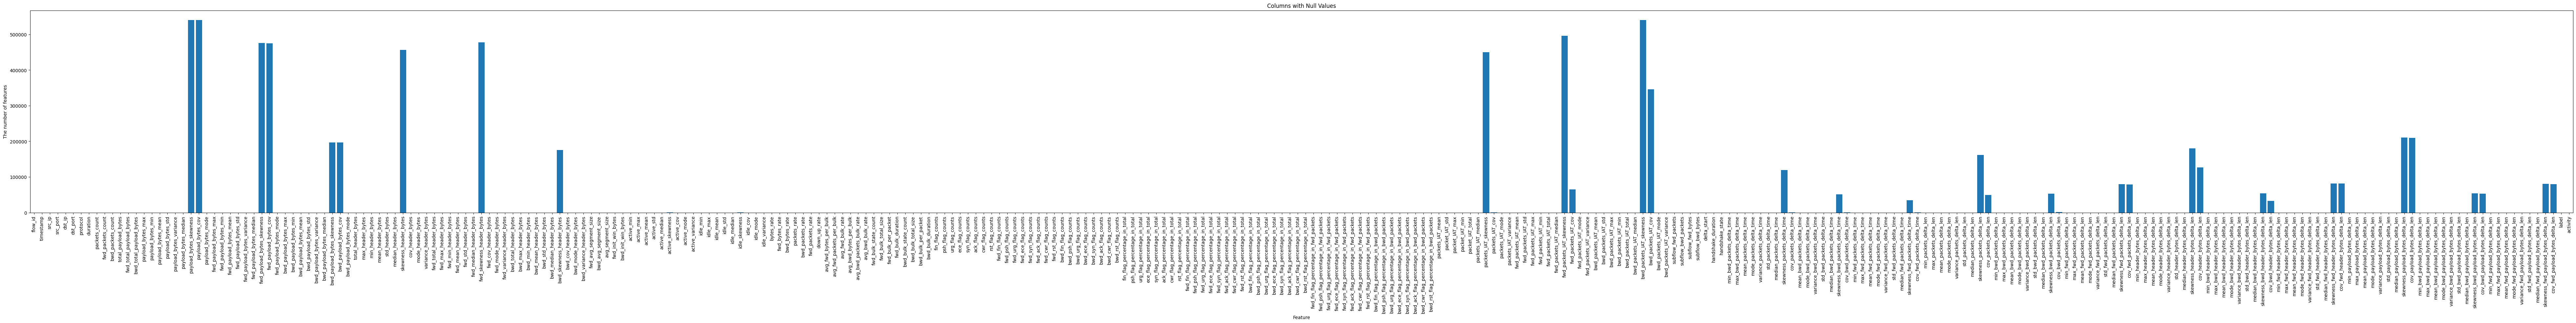

In [ ]:
print("Concise summary of data types and missing values:")
print()
df.info()
print()
print()
print("Number of missing values per column:")
df.isnull().sum()
print()
print()

plt.figure(figsize=( 100,8))
missing_values = df.isna().sum()
plt.bar(missing_values.index , missing_values)
missing_values.plot(kind='bar')

plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

plt.show()

In [ ]:

# Get basic statistics
basic_stats = df.describe(include='all')

# Count missing values
missing_values = df.isnull().sum()

# Get data types of each column
data_types = df.dtypes

# Get the number of unique values for each column
unique_values = df.nunique()

# Combine all statistics into a single DataFrame
stats_summary = pd.DataFrame({
        'Data Type': data_types,
        'Missing Values': missing_values,
        'Unique Values': unique_values
}).join(basic_stats)

# Display the summary
print(stats_summary)


                                     Data Type  Missing Values  Unique Values  \
flow_id                                 object               0         699995   
timestamp                               object               2         695034   
src_ip                                  object               0          11345   
src_port                                object               0          57933   
dst_ip                                  object               0           5091   
...                                        ...             ...            ...   
median_fwd_payload_bytes_delta_len      object               0            320   
skewness_fwd_payload_bytes_delta_len    object           80738           7045   
cov_fwd_payload_bytes_delta_len         object           80150           3521   
label                                   object               0              4   
activity                                object               0             27   

                           

In [ ]:
feature_list = df.columns.tolist()
print(feature_list)

from tabulate import tabulate

# List of dataset features

print("Dataset Features:")
print(tabulate([feature_list], headers=['Feature'], tablefmt='orgtbl'))
print()
print("Dataset Features:")
for i, feature_list in enumerate(feature_list, start=1):
    print(f"{i}. {feature_list}")

['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'payload_bytes_median', 'payload_bytes_skewness', 'payload_bytes_cov', 'payload_bytes_mode', 'fwd_payload_bytes_max', 'fwd_payload_bytes_min', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'fwd_payload_bytes_median', 'fwd_payload_bytes_skewness', 'fwd_payload_bytes_cov', 'fwd_payload_bytes_mode', 'bwd_payload_bytes_max', 'bwd_payload_bytes_min', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'bwd_payload_bytes_median', 'bwd_payload_bytes_skewness', 'bwd_payload_bytes_cov', 'bwd_payload_bytes_mode', 'total_header_bytes', 'max_header_bytes', 'min_header_bytes', 'mean_header_bytes', 'std

In [ ]:

print()
print()
print("Unique Activities:")
print('\n'.join([f"{i}. {activity}" for i, activity in enumerate(df.loc[:, 'activity'].unique(), start=1)]))



Unique Activities:
1. Benign
2. Benign-Telnet
3. Benign-Web_Browsing_HTTP-S
4. Benign-Email-Receive
5. Benign-Systemic
6. Benign-Email-Send
7. Benign-FTP
8. Benign-SSH
9. activity
10. Attack-TCP-Valid-SYN
11. Attack-TCP-BYPass-V1
12. Suspicious
13. Attack-Killall-v2
14. Attack-TCP-IGMP
15. Attack-TCP-SYN
16. Attack-Killer-TCP
17. Attack-TCP-Control
18. Attack-TCP-Flag-MIX
19. Attack-TCP-Flag-SYN
20. Attack-TCP-Flag-ACK
21. Attack-TCP-Flag-SYN-ACK
22. Attack-TCP-Flag-ACK-PSH
23. Attack-TCP-Flag-RST-ACK
24. Attack-TCP-Flag-SYN-TFO
25. Attack-TCP-Flag-SYN-TIME
26. Attack-TCP-Flag-OSYN
27. Attack-TCP-Flag-OSYNP


In [ ]:
#This code checks for negative values in numeric columns of a DataFrame (df).
for col in df.columns:
    if df[col].dtype in ['int', 'float']:  # Check if the column is numeric
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"Column '{col}' has {negative_count} negative values")

In [ ]:
#This code checks for strings representing negative numbers in object-type columns of a DataFrame (df).
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of type object (likely string)
        negative_count = df[col].apply(lambda x: x.startswith('-') if isinstance(x, str) else False).sum()
        if negative_count > 0:
            print(f"Column '{col}' has {negative_count} strings representing negative numbers")

Column 'payload_bytes_skewness' has 2637 strings representing negative numbers
Column 'fwd_payload_bytes_skewness' has 720 strings representing negative numbers
Column 'bwd_payload_bytes_skewness' has 3231 strings representing negative numbers
Column 'skewness_header_bytes' has 31658 strings representing negative numbers
Column 'fwd_skewness_header_bytes' has 593 strings representing negative numbers
Column 'bwd_skewness_header_bytes' has 2747 strings representing negative numbers
Column 'active_min' has 389 strings representing negative numbers
Column 'active_max' has 389 strings representing negative numbers
Column 'active_mean' has 389 strings representing negative numbers
Column 'active_median' has 389 strings representing negative numbers
Column 'active_skewness' has 5 strings representing negative numbers
Column 'active_cov' has 389 strings representing negative numbers
Column 'active_mode' has 389 strings representing negative numbers
Column 'idle_skewness' has 4 strings represe

In [ ]:
#BIG STEP
# This code removes leading and trailing whitespace from all column names in a pandas DataFrame.
df.columns = df.columns.str.strip()

In [ ]:
#Retrieve the unique values from the 'label' column in the DataFrame df and assigns them to the variable Label.
Label = df.loc[:,'label'].unique()

In [ ]:
print(Label)


['Benign' 'label' 'Attack' 'Suspicious']


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
Benign        413199
Attack        228469
Suspicious     59106
label              2
Name: count, dtype: int64


In [ ]:
#Cross checking  - unique values of the Label and their corresponding counts as the values.
vtr = [0,0,0,0]
for i in df.loc[:,'label']:
    if i=='Benign' : vtr[0] += 1
    elif i=='label' : vtr[1] += 1
    elif i=='Attack' : vtr[2] +=1
    elif i=='Suspicious' : vtr[3]+=1
print(vtr)

[413199, 2, 228469, 59106]


In [ ]:
print(df.duplicated().sum(), "fully duplicate rows to remove")


323 fully duplicate rows to remove


In [ ]:
#BIG STEP remove duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
Benign        412918
Attack        228449
Suspicious     59085
label              1
Name: count, dtype: int64


In [ ]:
print(df[df['label'] == "label"])

        flow_id  timestamp  src_ip  src_port  dst_ip  dst_port  protocol  \
294635  flow_id  timestamp  src_ip  src_port  dst_ip  dst_port  protocol   

        duration  packets_count  fwd_packets_count  ...  \
294635  duration  packets_count  fwd_packets_count  ...   

        max_fwd_payload_bytes_delta_len  mean_fwd_payload_bytes_delta_len  \
294635  max_fwd_payload_bytes_delta_len  mean_fwd_payload_bytes_delta_len   

        mode_fwd_payload_bytes_delta_len  \
294635  mode_fwd_payload_bytes_delta_len   

        variance_fwd_payload_bytes_delta_len  std_fwd_payload_bytes_delta_len  \
294635  variance_fwd_payload_bytes_delta_len  std_fwd_payload_bytes_delta_len   

        median_fwd_payload_bytes_delta_len  \
294635  median_fwd_payload_bytes_delta_len   

        skewness_fwd_payload_bytes_delta_len  cov_fwd_payload_bytes_delta_len  \
294635  skewness_fwd_payload_bytes_delta_len  cov_fwd_payload_bytes_delta_len   

        label  activity  
294635  label  activity  

[1 rows x 32

In [ ]:
df.shape

(700453, 324)

In [ ]:
#BIG STEP Remove row with Label.
# Label != label all the other rows except the above 2 rows
df = df[df['label'] != "label"]

In [ ]:
df.shape

(700452, 324)

In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
Benign        412918
Attack        228449
Suspicious     59085
Name: count, dtype: int64


In [ ]:
#Cross checking  - unique values of the Label and their corresponding counts as the values.
vtr = [0,0,0]
for i in df.loc[:,'label']:
    if i=='Benign' : vtr[0] += 1
    elif i=='Attack' : vtr[1] +=1
    elif i=='Suspicious' : vtr[2]+=1
print(vtr)

[412918, 228449, 59085]


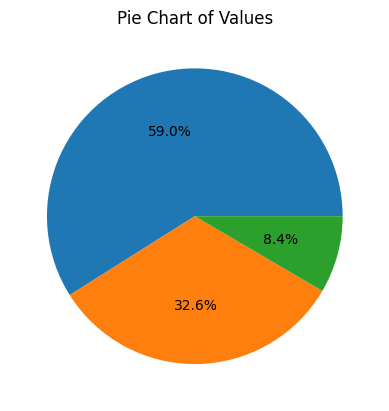

In [ ]:
import matplotlib.pyplot as plt


# Create a pie chart
plt.pie(vtr, autopct='%1.1f%%')
plt.title('Pie Chart of Values')
plt.show()

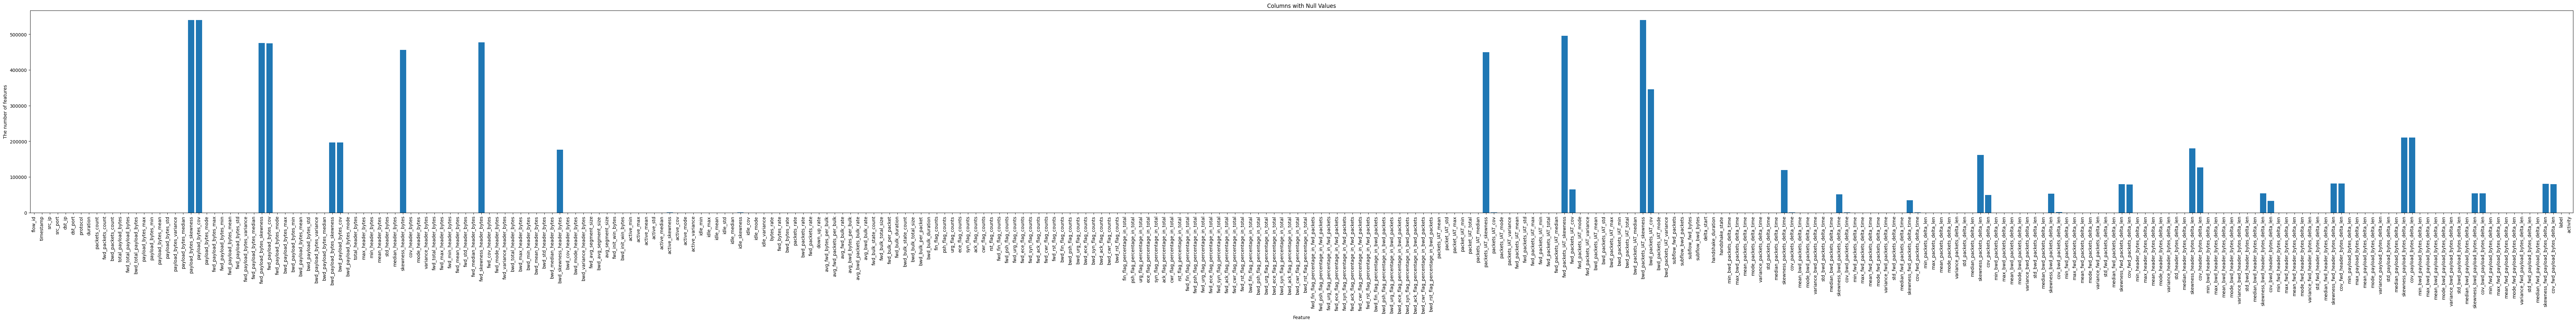

In [ ]:
#Draw a histogram of all features and show which have missing values. This tells you how useabale are the features.
plt.figure(figsize=( 100,8))

missing_values = df.isna().sum()
plt.bar(missing_values.index , missing_values)
missing_values.plot(kind='bar')

plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

plt.show()

In [ ]:
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
df.delta_start.value_counts()

544652 rows with at least one NaN to remove


,count
delta_start,
not a complete handshake,542317
0.0000,63448
0.0001,14979
0.0002,10909
0.0003,6744
...,...
3.0045,1
5.5759,1
5.3601,1


In [ ]:
print(df['protocol'])

0         TCP
1         TCP
2         TCP
3         TCP
4         TCP
         ... 
700448    TCP
700449    TCP
700450    TCP
700451    TCP
700452    TCP
Name: protocol, Length: 700452, dtype: object


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
Benign        412918
Attack        228449
Suspicious     59085
Name: count, dtype: int64


In [ ]:
for col in df.columns:
    if df[col].dtype in ['int', 'float']:  # Check if the column is numeric
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"Column '{col}' has {negative_count} negative values")

In [ ]:
df.shape

(700452, 324)

In [ ]:
#This code  displays the top 50 columns with the most missing values in a DataFrame (df).
with pd.option_context('display.max_rows', 50):
    print(df.isna().sum().sort_values(ascending=False).head(50))

bwd_packets_IAT_skewness                540076
payload_bytes_skewness                  539950
payload_bytes_cov                       539790
fwd_packets_IAT_skewness                495733
fwd_skewness_header_bytes               476960
fwd_payload_bytes_skewness              475705
fwd_payload_bytes_cov                   474964
skewness_header_bytes                   456402
packets_IAT_skewness                    449600
bwd_packets_IAT_cov                     345394
skewness_payload_bytes_delta_len        210316
cov_payload_bytes_delta_len             210016
bwd_payload_bytes_skewness              196912
bwd_payload_bytes_cov                   196674
skewness_header_bytes_delta_len         180376
bwd_skewness_header_bytes               175972
skewness_packets_delta_len              161362
cov_header_bytes_delta_len              126468
skewness_packets_delta_time             119740
skewness_fwd_header_bytes_delta_len      81861
cov_fwd_header_bytes_delta_len           81404
skewness_fwd_

In [ ]:
# List of features to check
features_to_check = [
    'bwd_packets_IAT_skewness',
    'payload_bytes_skewness',
    'payload_bytes_cov',
    'fwd_packets_IAT_skewness',
    'fwd_skewness_header_bytes',
    'fwd_payload_bytes_skewness',
    'fwd_payload_bytes_cov',
    'skewness_header_bytes',
    'packets_IAT_skewness',
    'bwd_packets_IAT_cov',
    'skewness_payload_bytes_delta_len',
    'cov_payload_bytes_delta_len',
    'bwd_payload_bytes_skewness',
    'bwd_payload_bytes_cov',
    'skewness_header_bytes_delta_len',
    'bwd_skewness_header_bytes',
    'skewness_packets_delta_len',
    'cov_header_bytes_delta_len',
    'skewness_packets_delta_time'
]

# Check which features are present and which are not
existing_features = [feature for feature in features_to_check if feature in df.columns]
missing_features = [feature for feature in features_to_check if feature not in df.columns]

# Output the result
print("Existing features:", existing_features)
print("Missing features:", missing_features)


Existing features: ['bwd_packets_IAT_skewness', 'payload_bytes_skewness', 'payload_bytes_cov', 'fwd_packets_IAT_skewness', 'fwd_skewness_header_bytes', 'fwd_payload_bytes_skewness', 'fwd_payload_bytes_cov', 'skewness_header_bytes', 'packets_IAT_skewness', 'bwd_packets_IAT_cov', 'skewness_payload_bytes_delta_len', 'cov_payload_bytes_delta_len', 'bwd_payload_bytes_skewness', 'bwd_payload_bytes_cov', 'skewness_header_bytes_delta_len', 'bwd_skewness_header_bytes', 'skewness_packets_delta_len', 'cov_header_bytes_delta_len', 'skewness_packets_delta_time']
Missing features: []


In [ ]:
# BIG STEP List of features to remove
features_to_remove = [
    'bwd_packets_IAT_skewness',
    'payload_bytes_skewness',
    'payload_bytes_cov',
    'fwd_packets_IAT_skewness',
    'fwd_skewness_header_bytes',
    'fwd_payload_bytes_skewness',
    'fwd_payload_bytes_cov',
    'skewness_header_bytes',
    'packets_IAT_skewness',
    'bwd_packets_IAT_cov',
    'skewness_payload_bytes_delta_len',
    'cov_payload_bytes_delta_len',
    'bwd_payload_bytes_skewness',
    'bwd_payload_bytes_cov',
    'skewness_header_bytes_delta_len',
    'bwd_skewness_header_bytes',
    'skewness_packets_delta_len',
    'cov_header_bytes_delta_len',
    'skewness_packets_delta_time'
]

# Drop the columns from the dataframe
df = df.drop(columns=features_to_remove)



In [ ]:
df.shape

(700452, 305)

In [ ]:
# Check if the feature exists in the dataframe
if 'cov_fwd_payload_bytes_delta_len' in df.columns:
    print("Feature exists in the dataframe.")
else:
    print("Feature does not exist in the dataframe.")


Feature exists in the dataframe.


In [ ]:
#This code  displays the top 50 columns with the most missing values in a DataFrame (df).
with pd.option_context('display.max_rows', 50):
    print(df.isna().sum().sort_values(ascending=False).head(50))

skewness_fwd_header_bytes_delta_len     81861
cov_fwd_header_bytes_delta_len          81404
skewness_fwd_payload_bytes_delta_len    80737
cov_fwd_payload_bytes_delta_len         80149
skewness_fwd_packets_delta_len          79764
cov_fwd_packets_delta_len               78915
fwd_packets_IAT_cov                     65306
skewness_bwd_payload_bytes_delta_len    54125
skewness_bwd_header_bytes_delta_len     53949
cov_bwd_payload_bytes_delta_len         53489
skewness_bwd_packets_delta_len          52604
skewness_bwd_packets_delta_time         51388
cov_packets_delta_len                   49033
skewness_fwd_packets_delta_time         35065
cov_bwd_header_bytes_delta_len          32549
cov_bwd_packets_delta_len                1445
active_skewness                           362
idle_skewness                             359
cov_packets_delta_time                    242
packets_IAT_cov                           241
cov_fwd_packets_delta_time                194
cov_bwd_packets_delta_time        

In [ ]:
total_rows_with_missing_values = df.isna().any(axis=1).sum()
print(f"Total number of rows with missing values: {total_rows_with_missing_values}")

Total number of rows with missing values: 167566


In [ ]:
df.shape

(700452, 305)

In [ ]:
#BIG STEP removing rows contain missing values.
#removes rows from a DataFrame that contain missing values.
df = df.dropna()

#store df in a new dataframce called data_f
#data_f is the pd with all non missing values rows
#data_f = df
#data_f.shape

In [ ]:
total_rows_with_missing_values = df.isna().any(axis=1).sum()
print(f"Total number of rows with missing values: {total_rows_with_missing_values}")

Total number of rows with missing values: 0


In [ ]:
df.shape

(532886, 305)

In [ ]:
#This code  displays the top 50 columns with the most missing values in a DataFrame (df).
with pd.option_context('display.max_rows', 50):
    print(df.isna().sum().sort_values(ascending=False).head(50))

activity                               0
flow_id                                0
timestamp                              0
src_ip                                 0
src_port                               0
dst_ip                                 0
dst_port                               0
protocol                               0
duration                               0
packets_count                          0
fwd_packets_count                      0
bwd_packets_count                      0
total_payload_bytes                    0
fwd_total_payload_bytes                0
bwd_total_payload_bytes                0
payload_bytes_max                      0
payload_bytes_min                      0
std_bwd_header_bytes_delta_len         0
median_bwd_header_bytes_delta_len      0
skewness_bwd_header_bytes_delta_len    0
cov_bwd_header_bytes_delta_len         0
min_fwd_header_bytes_delta_len         0
max_fwd_header_bytes_delta_len         0
mean_fwd_header_bytes_delta_len        0
mode_fwd_header_

In [ ]:
# Create a DataFrame from the 'label' Series
df_labels = df[['label']].copy() # Use double brackets to create a DataFrame
#copy and capture the label column in da pd frame, da has non missing values and all labels

In [ ]:
print(df_labels.info())
print (df_labels.head(10))
print()
print(df_labels.info())

<class 'pandas.core.frame.DataFrame'>
Index: 532886 entries, 34 to 700452
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   532886 non-null  object
dtypes: object(1)
memory usage: 8.1+ MB
None
     label
34  Benign
35  Benign
42  Benign
72  Benign
73  Benign
74  Benign
75  Benign
76  Benign
77  Benign
78  Benign

<class 'pandas.core.frame.DataFrame'>
Index: 532886 entries, 34 to 700452
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   532886 non-null  object
dtypes: object(1)
memory usage: 8.1+ MB
None


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
Benign        268826
Attack        211176
Suspicious     52884
Name: count, dtype: int64


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df_labels['label'].value_counts()
print(value_counts)

label
Benign        268826
Attack        211176
Suspicious     52884
Name: count, dtype: int64


In [ ]:
#BIG STEP
#oneHot encoding for labels in df (main pd dataframe)
df['label'] = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 2,
})
#oneHot encoding for labels in da (labels only 1 columns feature pd dataframe)
df_labels['label'] = df_labels['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 2,
})

In [ ]:
df['label']. head(10)

,label
34,0
35,0
42,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
0    268826
1    211176
2     52884
Name: count, dtype: int64


In [ ]:
df_labels['label']. head(10)

,label
34,0
35,0
42,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df_labels['label'].value_counts()
print(value_counts)

label
0    268826
1    211176
2     52884
Name: count, dtype: int64


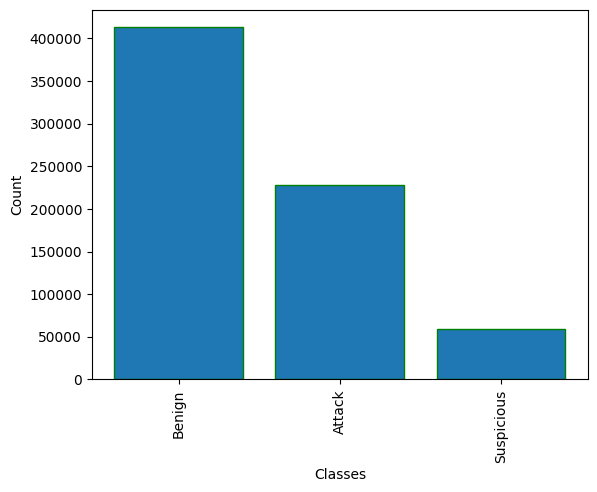

Historgram of Labels before removing null


In [ ]:
labels=['Benign', 'Attack', 'Suspicious']
plt.bar(range(3), vtr, tick_label=labels , edgecolor='green')
plt.xticks(range(3), labels, rotation=90)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()
print("Historgram of Labels before removing null")

In [ ]:
# after cleaning of null unique values of the Label and their corresponding counts as the values.
vtr_cleaned = [0,0,0]
for i in df_labels.loc[:,'label']:
    if i==0 : vtr_cleaned[0] += 1
    elif i==1 : vtr_cleaned[1] += 1
    elif i==2 : vtr_cleaned[2] +=1
print(vtr_cleaned)

[268826, 211176, 52884]


In [ ]:
#Cross checkin. Unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

label
0    268826
1    211176
2     52884
Name: count, dtype: int64


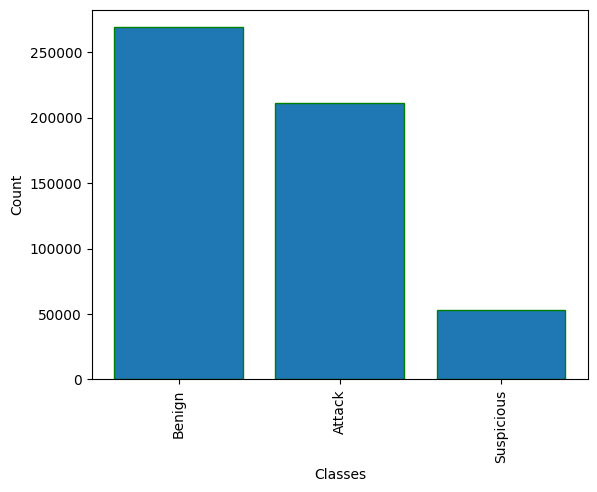

Historgram of Labels after cleaning nulls


In [ ]:
labels=['Benign', 'Attack', 'Suspicious']
plt.bar(range(3), vtr_cleaned, tick_label=labels , edgecolor='green')
plt.xticks(range(3), labels, rotation=90)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()
print("Historgram of Labels after cleaning nulls")

In [ ]:
#df.info()
#df.head(10)
#df.describe()
#data_f.describe()
#print()
#data_f.head(10)

In [ ]:
value_counts = df['protocol'].value_counts()
print(value_counts)
print("DST_PORT")
value_counts = df['dst_port'].value_counts()
print(value_counts)
print("SRC_PORT")
value_counts = df['src_port'].value_counts()
print(value_counts)
print("flow_id")
value_counts = df['flow_id'].value_counts()
print(value_counts)
print("src_ip")
value_counts = df['src_ip'].value_counts()
print(value_counts)
print("timestamp")
value_counts = df['timestamp'].value_counts()
print(value_counts)
print("dst_ip")
value_counts = df['dst_ip'].value_counts()
print(value_counts)


print("delta_start")
value_counts = df['delta_start'].value_counts()
print(value_counts)
print()
print("handshake_duration")
value_counts = df['handshake_duration'].value_counts()
print(value_counts)
print()
print("activity")
value_counts = df['activity'].value_counts()
print(value_counts)

print(df.duplicated().sum(), "fully duplicate rows to remove")
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

protocol
TCP    532886
Name: count, dtype: int64
DST_PORT
dst_port
3389     75760
445      69748
443      37889
80        4195
22        2847
         ...  
39334        2
34669        2
11064        2
33317        2
56570        2
Name: count, Length: 65535, dtype: int64
SRC_PORT
src_port
42048    71172
58872     4130
58856     4011
443       3397
45094     2946
         ...  
20840        1
46231        1
47021        1
28741        1
13356        1
Name: count, Length: 55060, dtype: int64
flow_id
flow_id
10.0.9.208_54864_104.244.42.5_443_TCP_2023-12-18 14:03:25.893781      2
10.0.4.132_64580_104.244.42.197_443_TCP_2023-12-19 14:19:26.871731    2
10.0.9.208_51850_52.167.17.97_443_TCP_2023-12-19 11:20:38.734295      2
10.0.3.52_50419_52.85.108.10_443_TCP_2023-12-19 11:05:24.483674       2
10.0.11.84_49964_76.13.32.146_443_TCP_2023-12-18 14:08:49.424956      2
                                                                     ..
89.248.165.5_56341_10.0.4.57_13772_TCP_2023-12-18 09:49

In [ ]:
print("delta_start")
value_counts = df['delta_start'].value_counts()
print(value_counts)
print()
print("handshake_duration")
value_counts = df['handshake_duration'].value_counts()
print(value_counts)
print()
print("activity")
value_counts = df['activity'].value_counts()
print(value_counts)

delta_start
delta_start
not a complete handshake    377158
0.0000                       63180
0.0001                       14805
0.0002                       10802
0.0003                        6705
                             ...  
-2.3390                          1
-0.3389                          1
-0.3623                          1
1.1223                           1
1.0765                           1
Name: count, Length: 3478, dtype: int64

handshake_duration
handshake_duration
not a complete handshake    377158
0.1111                        4170
0.1112                        3447
0.1113                        3038
0.1110                        2473
                             ...  
3.1021                           1
1.2066                           1
1.0896                           1
1.0894                           1
1.0860                           1
Name: count, Length: 4146, dtype: int64

activity
activity
Benign                        178831
Attack-TCP-BYPass-V1          1

In [ ]:
df.shape

(532886, 305)

In [ ]:
print("df printout")
print("delta_start")
value_counts = df['delta_start'].value_counts()
print(value_counts)
print()
print("handshake_duration")
value_counts = df['handshake_duration'].value_counts()
print(value_counts)
print()
print("activity")
value_counts = df['activity'].value_counts()
print(value_counts)

df printout
delta_start
delta_start
not a complete handshake    377158
0.0000                       63180
0.0001                       14805
0.0002                       10802
0.0003                        6705
                             ...  
-2.3390                          1
-0.3389                          1
-0.3623                          1
1.1223                           1
1.0765                           1
Name: count, Length: 3478, dtype: int64

handshake_duration
handshake_duration
not a complete handshake    377158
0.1111                        4170
0.1112                        3447
0.1113                        3038
0.1110                        2473
                             ...  
3.1021                           1
1.2066                           1
1.0896                           1
1.0894                           1
1.0860                           1
Name: count, Length: 4146, dtype: int64

activity
activity
Benign                        178831
Attack-TCP-BYPass-V

In [ ]:
print(df[['delta_start', 'handshake_duration']][:100].to_string(index=False, header=False)) # print 100 lines only

not a complete handshake not a complete handshake
                 -0.0113                   0.0114
not a complete handshake not a complete handshake
                 -0.0244                   0.0244
                  0.3653                   0.0147
                  0.3449                   0.0153
                  0.4931                   0.0145
                  0.3513                   0.0147
                  0.4280                   0.0146
                  0.3726                   0.0291
                  0.0056                   0.0028
                  0.0004                   0.0136
                  0.0091                   0.0652
                  0.0042                   0.0021
                  0.0001                   0.0016
                  0.0064                   0.0095
                  0.0067                   0.0099
                 -0.0077                   0.0077
                  0.0057                   0.0029
                  0.0054                   0.0068


# **replace all "not a complete handshake" strings in handshake_duration and delta_start feature with 0 in data_f dataframe**

In [ ]:
df.shape

(532886, 305)

In [ ]:
#BIG STEP replace all "not a complete handshake" strings in handshake_duration and delta_start feature with 0 in df dataframe
df['handshake_duration'] = df['handshake_duration'].replace({'not a complete handshake': 0})
df['delta_start'] = df['delta_start'].replace({'not a complete handshake': 0})

In [ ]:
print("df printout")
print("delta_start")
value_counts = df['delta_start'].value_counts()
print(value_counts)
print()
print("handshake_duration")
value_counts = df['handshake_duration'].value_counts()
print(value_counts)
print()
print("activity")
value_counts = df['activity'].value_counts()
print(value_counts)

df printout
delta_start
delta_start
0          377158
0.0000      63180
0.0001      14805
0.0002      10802
0.0003       6705
            ...  
-2.3390         1
-0.3389         1
-0.3623         1
1.1223          1
1.0765          1
Name: count, Length: 3478, dtype: int64

handshake_duration
handshake_duration
0         377158
0.1111      4170
0.1112      3447
0.1113      3038
0.1110      2473
           ...  
3.1021         1
1.2066         1
1.0896         1
1.0894         1
1.0860         1
Name: count, Length: 4146, dtype: int64

activity
activity
Benign                        178831
Attack-TCP-BYPass-V1          136912
Suspicious                     52884
Benign-Systemic                43024
Benign-Web_Browsing_HTTP-S     41516
Attack-TCP-Flag-ACK             9262
Attack-TCP-Flag-SYN-ACK         6780
Attack-TCP-Valid-SYN            6472
Attack-TCP-Flag-SYN             6418
Attack-TCP-Flag-MIX             6165
Attack-TCP-Flag-ACK-PSH         5971
Attack-TCP-IGMP                 58

In [ ]:
df.shape

(532886, 305)

In [ ]:
print("df printout")
print("delta_start")
value_counts = df['delta_start'].value_counts()
print(value_counts)
print()
print("handshake_duration")
value_counts = df['handshake_duration'].value_counts()
print(value_counts)
print()
print("activity")
value_counts = df['activity'].value_counts()
print(value_counts)

df printout
delta_start
delta_start
0          377158
0.0000      63180
0.0001      14805
0.0002      10802
0.0003       6705
            ...  
-2.3390         1
-0.3389         1
-0.3623         1
1.1223          1
1.0765          1
Name: count, Length: 3478, dtype: int64

handshake_duration
handshake_duration
0         377158
0.1111      4170
0.1112      3447
0.1113      3038
0.1110      2473
           ...  
3.1021         1
1.2066         1
1.0896         1
1.0894         1
1.0860         1
Name: count, Length: 4146, dtype: int64

activity
activity
Benign                        178831
Attack-TCP-BYPass-V1          136912
Suspicious                     52884
Benign-Systemic                43024
Benign-Web_Browsing_HTTP-S     41516
Attack-TCP-Flag-ACK             9262
Attack-TCP-Flag-SYN-ACK         6780
Attack-TCP-Valid-SYN            6472
Attack-TCP-Flag-SYN             6418
Attack-TCP-Flag-MIX             6165
Attack-TCP-Flag-ACK-PSH         5971
Attack-TCP-IGMP                 58

In [ ]:
print(df.duplicated().sum(), "fully duplicate rows to remove")
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

0 fully duplicate rows to remove
0 rows with at least one NaN to remove


In [ ]:
df.shape

(532886, 305)

# **Encode 'timestamp', 'src_ip', 'dst_ip' before converting them to numbers**

In [ ]:
#time_stamp encoding
import pandas as pd

# Convert the string timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

df['timestamp'] = df['timestamp'].view('int64') / 10**3


# Display the result
print(df[['timestamp']].head(10))

       timestamp
34  1.702544e+15
35  1.702544e+15
42  1.702544e+15
72  1.702545e+15
73  1.702545e+15
74  1.702545e+15
75  1.702545e+15
76  1.702545e+15
77  1.702545e+15
78  1.702545e+15


<ipython-input-74-df7c3432d3dc>:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['timestamp'] = df['timestamp'].view('int64') / 10**3


In [ ]:
print("Timestamp:")
print(df['timestamp'].describe())
print("Unique counts:", df['timestamp'].nunique())
print("Types:", df['timestamp'].dtypes)

Timestamp:
count    5.328860e+05
mean     1.702850e+15
std      1.189584e+11
min      1.702544e+15
25%      1.702741e+15
50%      1.702893e+15
75%      1.702910e+15
max      1.703005e+15
Name: timestamp, dtype: float64
Unique counts: 528061
Types: float64


In [ ]:
#src_ip encoding
import pandas as pd
import ipaddress


# Function to convert IP address string to a numerical value
def ip_to_int(ip_str):
    return int(ipaddress.IPv4Address(ip_str))

# Apply the conversion to the 'src_ip' column
df['src_ip'] = df['src_ip'].apply(ip_to_int)

# Display the result
print(df['src_ip'].head(10))


34     764397614
35     167772980
42    3400162195
72     167774672
73     167774672
74     167774672
75     167774672
76     167774672
77     167774672
78     167774672
Name: src_ip, dtype: int64


In [ ]:
print("\nSrc IP:")
print(df['src_ip'].describe())
print("Unique counts:", df['src_ip'].nunique())
print("Types:", df['src_ip'].dtypes)


Src IP:
count    5.328860e+05
mean     2.089702e+09
std      9.227419e+08
min      1.689209e+07
25%      1.509468e+09
50%      2.185225e+09
75%      2.807993e+09
max      3.757319e+09
Name: src_ip, dtype: float64
Unique counts: 9369
Types: int64


In [ ]:
#dst_ip encoding
import pandas as pd
import ipaddress


# Function to convert IP address string to a numerical value
def ip_to_int(ip_str):
    return int(ipaddress.IPv4Address(ip_str))

# Apply the conversion to the 'src_ip' column
df['dst_ip'] = df['dst_ip'].apply(ip_to_int)

# Display the result
print(df['dst_ip'].head(10))

34     167772712
35     390720990
42     167773241
72    2354213126
73    2354212870
74    2354212870
75    2354212870
76    2354212870
77    2354213380
78    3116854661
Name: dst_ip, dtype: int64


In [ ]:
print("\nDst IP:")
print(df['dst_ip'].describe())
print("Unique counts:", df['dst_ip'].nunique())
print("Types:", df['dst_ip'].dtypes)


Dst IP:
count    5.328860e+05
mean     3.132674e+08
std      6.047794e+08
min      5.116342e+07
25%      1.677733e+08
50%      1.677738e+08
75%      1.677747e+08
max      3.736736e+09
Name: dst_ip, dtype: float64
Unique counts: 1943
Types: int64


In [ ]:
df.shape

(532886, 305)

In [ ]:
'''
BIG STEP - df is gone. data_f is new numeric dataframe. Convert all columns to numeric and replace non-numeric values with NaN.
This line of code applies the pd.to_numeric function to each column of the DataFrame df, attempting to convert the values to numeric (integer or float) data types. The errors='coerce' parameter specifies how to handle values that cannot be converted to numeric.
Here's what happens:
Conversion to Numeric: pd.to_numeric tries to convert each value in the DataFrame to a numeric type (either integer or float).
Error Handling: If a value cannot be converted to numeric (e.g., a string or missing value),
the errors='coerce' parameter instructs pandas to replace that value with NaN (Not a Number).
Result: The resulting DataFrame data_f will have numeric values where possible, and NaN values where conversion was not possible.
'''
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
df.shape

(532886, 305)

In [ ]:
print(df['label'].head)
#Cross checkin. Unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)

<bound method NDFrame.head of 34        0
35        0
42        0
72        0
73        0
         ..
700447    0
700448    0
700449    0
700450    2
700452    0
Name: label, Length: 532886, dtype: int64>
label
0    268826
1    211176
2     52884
Name: count, dtype: int64


In [ ]:
df.shape

(532886, 305)

In [ ]:
df.dtypes

,0
flow_id,float64
timestamp,float64
src_ip,int64
src_port,int64
dst_ip,int64
...,...
median_fwd_payload_bytes_delta_len,float64
skewness_fwd_payload_bytes_delta_len,float64
cov_fwd_payload_bytes_delta_len,float64
label,int64


In [ ]:
print(df['activity'].head)

<bound method NDFrame.head of 34       NaN
35       NaN
42       NaN
72       NaN
73       NaN
          ..
700447   NaN
700448   NaN
700449   NaN
700450   NaN
700452   NaN
Name: activity, Length: 532886, dtype: float64>


In [ ]:
nan_counts = df.isnull().sum().sort_values(ascending=False)
print(nan_counts.head(10))

protocol                       532886
flow_id                        532886
activity                       532886
median_packets_delta_time           0
variance_packets_delta_time         0
mode_packets_delta_time             0
mean_packets_delta_time             0
max_bwd_packets_delta_time          0
min_bwd_packets_delta_time          0
handshake_state                     0
dtype: int64


In [ ]:
print()

print(df.head(10))
value_counts = df['label'].value_counts()
print(value_counts)

print("DST_PORT")
value_counts = df['dst_port'].value_counts()
print(value_counts)
print()
print(" NaN values left: ")
print(df.isnull().sum())

nan_count = df.isnull().sum().reset_index()
nan_count.columns = ['Column', 'NaN Count']
print(nan_count)
print()

for col in df.columns[df.isnull().sum() > 0]:
    print(f"Column '{col}' has {df[col].isnull().sum()} NaN values")

#Cross checkin. Unique values of the Label and their corresponding counts as the values.
value_counts = df['label'].value_counts()
print(value_counts)


    flow_id     timestamp      src_ip  src_port      dst_ip  dst_port  \
34      NaN  1.702544e+15   764397614     40049   167772712     38125   
35      NaN  1.702544e+15   167772980     58932   390720990       443   
42      NaN  1.702544e+15  3400162195     40067   167773241     64294   
72      NaN  1.702545e+15   167774672     49800  2354213126       443   
73      NaN  1.702545e+15   167774672     49801  2354212870       443   
74      NaN  1.702545e+15   167774672     49802  2354212870       443   
75      NaN  1.702545e+15   167774672     49803  2354212870       443   
76      NaN  1.702545e+15   167774672     49806  2354212870       443   
77      NaN  1.702545e+15   167774672     49804  2354213380       443   
78      NaN  1.702545e+15   167774672     49805  3116854661       443   

    protocol  duration  packets_count  fwd_packets_count  ...  \
34       NaN  0.000057              2                  1  ...   
35       NaN  0.153599             25                 10  ...   


In [ ]:
nan_counts = df.isnull().sum().sort_values(ascending=False)
print(nan_counts.head(10))

protocol                       532886
flow_id                        532886
activity                       532886
median_packets_delta_time           0
variance_packets_delta_time         0
mode_packets_delta_time             0
mean_packets_delta_time             0
max_bwd_packets_delta_time          0
min_bwd_packets_delta_time          0
handshake_state                     0
dtype: int64


In [ ]:
#BIG STEP dropping columns data_f_cleaned is now with less columns
#more cleaning the following columns after converitng to numbers were NaN (due to pd_to numeric replace non numeric to NaN) and hence need to be dropped
#not sure about src_port and dst_port and 'delta_start' 'handshake_duration'
columns_to_drop = [
    'flow_id','protocol',
     'activity']

data_f_cleaned = df.drop(columns=columns_to_drop)

#print(data_f_cleaned.head())
data_f_cleaned.shape
data_f_cleaned.describe()
print()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [ ]:
data_f_cleaned.shape
data_f_cleaned.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,timestamp,src_ip,src_port,dst_ip,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,...,min_fwd_payload_bytes_delta_len,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label
count,5.328860e+05,5.328860e+05,532886.000000,5.328860e+05,532886.000000,532886.000000,5.328860e+05,5.328860e+05,5.328860e+05,5.328860e+05,...,532886.000000,532886.000000,532886.000000,532886.000000,5.328860e+05,532886.000000,532886.000000,532886.000000,532886.0000,532886.000000
mean,1.702850e+15,2.089702e+09,45762.654078,3.132674e+08,17345.054496,5.226569,1.633668e+02,4.309686e+01,1.202699e+02,1.933794e+05,...,-169.217746,145.845046,0.154268,-103.845909,2.369932e+04,79.885010,5.206950,-0.146769,inf,0.594769
std,1.189584e+11,9.227419e+08,12910.150322,6.047794e+08,19967.515712,110.911338,1.680077e+04,6.001075e+03,1.370233e+04,2.137078e+07,...,280.362325,256.136317,3.624940,226.024694,4.910200e+04,131.596875,14.729393,0.367112,NaN,0.662949
min,1.702544e+15,1.689209e+07,21.000000,5.116342e+07,1.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1460.000000,0.000000,-38.857100,-1460.000000,0.000000e+00,0.000000,-53.000000,-21.778000,-645553.0333,0.000000
25%,1.702741e+15,1.509468e+09,42048.000000,1.677733e+08,1080.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-452.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.035600,0.0000,0.000000
50%,1.702893e+15,2.185225e+09,47930.000000,1.677738e+08,7285.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,0.000000
75%,1.702910e+15,2.807993e+09,54852.000000,1.677747e+08,31231.000000,0.664716,1.400000e+01,7.000000e+00,7.000000e+00,1.578000e+03,...,0.000000,296.000000,0.000000,0.000000,4.155171e+04,203.842400,0.000000,0.000000,NaN,1.000000
max,1.703005e+15,3.757319e+09,65534.000000,3.736736e+09,65535.000000,28815.941665,4.005660e+06,1.946545e+06,3.643637e+06,5.192012e+09,...,37.000000,1460.000000,225.666700,1132.000000,1.292254e+06,1136.773600,398.500000,37.805200,inf,2.000000


In [ ]:
data_f_cleaned.shape

(532886, 302)

In [ ]:
print(data_f_cleaned.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

0 rows with at least one NaN to remove


In [ ]:
# Count rows with at least one infinity value
# Count rows with at least one infinity value
count = np.isinf(data_f_cleaned).any(axis=1).sum()

print(f"Number of rows with at least one infinity value: {count}")

Number of rows with at least one infinity value: 155210


In [ ]:
#which columns are infinity and exceed float32 maximum
for col in data_f_cleaned.columns:
    inf_count = np.isinf(data_f_cleaned[col]).sum()
    if inf_count > 0:
        print(f"Column '{col}' has {inf_count} infinity values")

print()
print()
for col in data_f_cleaned.columns:
    exceed_count = (data_f_cleaned[col] > np.finfo(np.float32).max).sum()
    if exceed_count > 0:
        print(f"Column '{col}' has {exceed_count} values exceeding float32 maximum")

Column 'cov_packets_delta_len' has 135 infinity values
Column 'cov_bwd_packets_delta_len' has 245 infinity values
Column 'cov_fwd_packets_delta_len' has 808 infinity values
Column 'cov_bwd_header_bytes_delta_len' has 62 infinity values
Column 'cov_fwd_header_bytes_delta_len' has 812 infinity values
Column 'cov_bwd_payload_bytes_delta_len' has 100992 infinity values
Column 'cov_fwd_payload_bytes_delta_len' has 148786 infinity values


Column 'cov_packets_delta_len' has 135 values exceeding float32 maximum
Column 'cov_bwd_packets_delta_len' has 245 values exceeding float32 maximum
Column 'cov_fwd_packets_delta_len' has 808 values exceeding float32 maximum
Column 'cov_bwd_header_bytes_delta_len' has 62 values exceeding float32 maximum
Column 'cov_fwd_header_bytes_delta_len' has 812 values exceeding float32 maximum
Column 'cov_bwd_payload_bytes_delta_len' has 100992 values exceeding float32 maximum
Column 'cov_fwd_payload_bytes_delta_len' has 148786 values exceeding float32 maximum


In [ ]:
data_f_cleaned.shape

(532886, 302)

In [ ]:
# Check if the feature exists in the dataframe
if 'cov_fwd_payload_bytes_delta_len' in data_f_cleaned.columns:
    print("Feature exists in the dataframe.")
else:
    print("Feature does not exist in the dataframe.")


Feature exists in the dataframe.


In [ ]:
# Check if the feature exists in the dataframe
if 'cov_payload_bytes_delta_len' in data_f_cleaned.columns:
    print("Feature exists in the dataframe.")
else:
    print("Feature does not exist in the dataframe.")


Feature does not exist in the dataframe.


In [ ]:
data_f_cleaned.shape

(532886, 302)

In [ ]:
#BIG STEP dropping columns data_f_cleaned is now with less columns
#which have infinity and flat 32 max


columns_to_drop = [
    'cov_bwd_payload_bytes_delta_len', 'cov_fwd_payload_bytes_delta_len']
data_f_cleaned = data_f_cleaned.drop(columns=columns_to_drop)

In [ ]:
data_f_cleaned.shape

(532886, 300)

In [ ]:
# Count rows with at least one infinity value
# Count rows with at least one infinity value
count = np.isinf(data_f_cleaned).any(axis=1).sum()

print(f"Number of rows with at least one infinity value: {count}")

Number of rows with at least one infinity value: 1054


In [ ]:
#which columns are infinity and exceed float32 maximum
for col in data_f_cleaned.columns:
    inf_count = np.isinf(data_f_cleaned[col]).sum()
    if inf_count > 0:
        print(f"Column '{col}' has {inf_count} infinity values")

print()
print()
for col in data_f_cleaned.columns:
    exceed_count = (data_f_cleaned[col] > np.finfo(np.float32).max).sum()
    if exceed_count > 0:
        print(f"Column '{col}' has {exceed_count} values exceeding float32 maximum")

Column 'cov_packets_delta_len' has 135 infinity values
Column 'cov_bwd_packets_delta_len' has 245 infinity values
Column 'cov_fwd_packets_delta_len' has 808 infinity values
Column 'cov_bwd_header_bytes_delta_len' has 62 infinity values
Column 'cov_fwd_header_bytes_delta_len' has 812 infinity values


Column 'cov_packets_delta_len' has 135 values exceeding float32 maximum
Column 'cov_bwd_packets_delta_len' has 245 values exceeding float32 maximum
Column 'cov_fwd_packets_delta_len' has 808 values exceeding float32 maximum
Column 'cov_bwd_header_bytes_delta_len' has 62 values exceeding float32 maximum
Column 'cov_fwd_header_bytes_delta_len' has 812 values exceeding float32 maximum


In [ ]:
data_f_cleaned.shape

(532886, 300)

In [ ]:
#BIG STEP dropping removing rows with ALL inifinity values

data_f_cleaned = data_f_cleaned[~np.isinf(data_f_cleaned).any(axis=1)]


In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
# Count rows with at least one infinity value
# Count rows with at least one infinity value
count = np.isinf(data_f_cleaned).any(axis=1).sum()

print(f"Number of rows with at least one infinity value: {count}")

Number of rows with at least one infinity value: 0


In [ ]:
#which columns are infinity and exceed float32 maximum
for col in data_f_cleaned.columns:
    inf_count = np.isinf(data_f_cleaned[col]).sum()
    if inf_count > 0:
        print(f"Column '{col}' has {inf_count} infinity values")

print()
print()
for col in data_f_cleaned.columns:
    exceed_count = (data_f_cleaned[col] > np.finfo(np.float32).max).sum()
    if exceed_count > 0:
        print(f"Column '{col}' has {exceed_count} values exceeding float32 maximum")

In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
for col in data_f_cleaned.columns:
    inf_count = np.isinf(data_f_cleaned[col]).sum()
    if inf_count > 0:
        print(f"Column '{col}' has {inf_count} infinity values")

print()
print()
for col in data_f_cleaned.columns:
    exceed_count = (data_f_cleaned[col] > np.finfo(np.float32).max).sum()
    if exceed_count > 0:
        print(f"Column '{col}' has {exceed_count} values exceeding float32 maximum")

In [ ]:
print(data_f_cleaned.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

0 rows with at least one NaN to remove


In [ ]:
# Calculate the number of NaN values for each feature
nan_counts = data_f_cleaned.isna().sum()

# Sort features by the number of NaN values in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Get the top 50 features with the most NaN values
top_50_nan_features = nan_counts_sorted.head(50)

# Display the top 50 features with NaN values
print(top_50_nan_features)


label                                  0
timestamp                              0
src_ip                                 0
src_port                               0
dst_ip                                 0
dst_port                               0
duration                               0
packets_count                          0
fwd_packets_count                      0
bwd_packets_count                      0
total_payload_bytes                    0
fwd_total_payload_bytes                0
mean_bwd_header_bytes_delta_len        0
mode_bwd_header_bytes_delta_len        0
variance_bwd_header_bytes_delta_len    0
std_bwd_header_bytes_delta_len         0
median_bwd_header_bytes_delta_len      0
skewness_bwd_header_bytes_delta_len    0
cov_bwd_header_bytes_delta_len         0
min_fwd_header_bytes_delta_len         0
max_header_bytes_delta_len             0
mean_header_bytes_delta_len            0
mode_header_bytes_delta_len            0
variance_header_bytes_delta_len        0
std_header_bytes

In [ ]:
for col in data_f_cleaned.columns[data_f_cleaned.isnull().sum() > 0]:
    print(f"Column '{col}' has {data_f_cleaned[col].isnull().sum()} NaN values")

#Cross checkin. Unique values of the Label and their corresponding counts as the values.
value_counts = data_f_cleaned['label'].value_counts()
print(value_counts)

label
0    267907
1    211051
2     52874
Name: count, dtype: int64


In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
# why? BIG STEP remove all row with Nan from number conversion
data_f_cleaned = data_f_cleaned.dropna()

In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
print(data_f_cleaned.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

0 rows with at least one NaN to remove


In [ ]:
print(data_f_cleaned.shape)


(531832, 300)


In [ ]:
for col in data_f_cleaned.columns[data_f_cleaned.isnull().sum() > 0]:
    print(f"Column '{col}' has {data_f_cleaned[col].isnull().sum()} NaN values")

#Cross checkin. Unique values of the Label and their corresponding counts as the values.
value_counts = data_f_cleaned['label'].value_counts()
print(value_counts)

label
0    267907
1    211051
2     52874
Name: count, dtype: int64


In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
for col in data_f_cleaned.columns:
    negative_count = (data_f_cleaned[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative values")

#

Column 'active_min' has 9 negative values
Column 'active_max' has 9 negative values
Column 'active_mean' has 9 negative values
Column 'active_median' has 9 negative values
Column 'active_skewness' has 2 negative values
Column 'active_cov' has 9 negative values
Column 'active_mode' has 9 negative values
Column 'idle_skewness' has 1 negative values
Column 'packet_IAT_min' has 11 negative values
Column 'fwd_packets_IAT_min' has 1 negative values
Column 'bwd_packets_IAT_min' has 4 negative values
Column 'delta_start' has 4347 negative values
Column 'skewness_bwd_packets_delta_time' has 47539 negative values
Column 'skewness_fwd_packets_delta_time' has 96076 negative values
Column 'min_packets_delta_len' has 234832 negative values
Column 'max_packets_delta_len' has 80080 negative values
Column 'mean_packets_delta_len' has 233759 negative values
Column 'mode_packets_delta_len' has 142432 negative values
Column 'median_packets_delta_len' has 84957 negative values
Column 'cov_packets_delta_len

In [ ]:
negative_features = (data_f_cleaned < 0).sum().sort_values(ascending=False)
print(negative_features.head(60))

min_packets_delta_len                   234832
mean_packets_delta_len                  233759
min_header_bytes_delta_len              200962
mean_header_bytes_delta_len             200913
min_payload_bytes_delta_len             154990
min_fwd_header_bytes_delta_len          154752
min_fwd_packets_delta_len               154751
cov_fwd_header_bytes_delta_len          154751
min_bwd_header_bytes_delta_len          154748
cov_bwd_header_bytes_delta_len          154748
mean_fwd_header_bytes_delta_len         154725
mean_bwd_header_bytes_delta_len         154701
min_bwd_packets_delta_len               154564
min_fwd_payload_bytes_delta_len         154541
min_bwd_payload_bytes_delta_len         154426
cov_packets_delta_len                   153719
skewness_bwd_header_bytes_delta_len     152652
cov_fwd_packets_delta_len               147842
mean_fwd_packets_delta_len              147822
mode_packets_delta_len                  142432
skewness_fwd_payload_bytes_delta_len    141151
skewness_fwd_

In [ ]:
data_f_cleaned.dtypes
print(data_f_cleaned.isna().any(axis=1).sum(), "rows with at least one NaN to remove")

0 rows with at least one NaN to remove


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df_labels['label'].value_counts()
print(value_counts)

label
0    268826
1    211176
2     52884
Name: count, dtype: int64


In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = data_f_cleaned['label'].value_counts()
print(value_counts)

label
0    267907
1    211051
2     52874
Name: count, dtype: int64


In [ ]:
# Create a DataFrame from the 'label' Series
df_labels = data_f_cleaned[['label']].copy() # Use double brackets to create a DataFrame
#copy and capture the label column in da pd frame, da has non missing values and all labels

In [ ]:
#unique values of the Label and their corresponding counts as the values.
value_counts = df_labels['label'].value_counts()
print(value_counts)

label
0    267907
1    211051
2     52874
Name: count, dtype: int64


## **This is the point wehere you data_f_cleaned is done. Ready for feature eng and modeling**

In [ ]:
data_f_cleaned.shape

(531832, 300)

In [ ]:
data_f_cleaned_new = data_f_cleaned[
    [
        'median_header_bytes',
        'variance_fwd_payload_bytes_delta_len',
        'min_fwd_payload_bytes_delta_len',
        'std_fwd_header_bytes_delta_len',
        'total_payload_bytes',
        'packets_IAT_median',
        'mode_bwd_packets_delta_len',
        'syn_flag_percentage_in_total',
        'bwd_packets_IAT_mode',
        'std_fwd_payload_bytes_delta_len',
        'dst_ip',
        'fwd_syn_flag_percentage_in_total',
        'max_packets_delta_len',
        'packet_IAT_min',
        'avg_segment_size',
        'std_header_bytes',
        'bwd_payload_bytes_mean',
        'payload_bytes_variance',
        'fwd_mode_header_bytes',
        'max_fwd_packets_delta_time',
        'fwd_bytes_rate',
        'mean_packets_delta_len',
        'bwd_mean_header_bytes',
        'fwd_payload_bytes_median',
        'bwd_packets_IAT_median',
        'fwd_packets_IAT_mean',
        'fwd_total_payload_bytes',
        'bwd_std_header_bytes',
        'timestamp',
        'fwd_packets_IAT_min',
        'bwd_total_payload_bytes',
        'median_fwd_packets_delta_time',
        'variance_header_bytes',
        'mean_header_bytes',
        'skewness_bwd_packets_delta_time',
        'fwd_min_header_bytes',
        'fwd_packets_IAT_max',
        'packets_rate',
        'mode_fwd_packets_delta_len',
        'bwd_avg_segment_size',
        'max_payload_bytes_delta_len',
        'packets_IAT_mean',
        'dst_port',
        'payload_bytes_mean',
        'bwd_bytes_rate',
        'payload_bytes_max',
        'fwd_packets_IAT_mode',
        'min_bwd_packets_delta_time',
        'src_port',
        'fwd_packets_rate',
        'fwd_avg_segment_size',
        'mean_header_bytes_delta_len',
        'packet_IAT_max',
        'psh_flag_counts',
        'fwd_syn_flag_percentage_in_fwd_packets',
        'bwd_packets_IAT_mean',
        'packet_IAT_total',
        'fwd_init_win_bytes',
        'max_bwd_packets_delta_len',
        'packets_IAT_mode',
        'fwd_median_header_bytes',
        'mode_header_bytes',
        'total_header_bytes',
        'mode_bwd_payload_bytes_delta_len',
        'median_fwd_packets_delta_len',
        'fwd_syn_flag_counts',
        'bwd_packets_IAT_min',
        'fwd_packets_IAT_total',
        'fwd_payload_bytes_max',
        'bwd_packets_IAT_total',
        'mean_packets_delta_time',
        'std_fwd_packets_delta_len',
        'fwd_total_header_bytes',
        'fwd_payload_bytes_variance',
        'duration',
        'syn_flag_counts',
        'bwd_packets_count',
        'handshake_state',
        'skewness_fwd_packets_delta_time',
        'median_packets_delta_len',
        'payload_bytes_median',
        'median_packets_delta_time',
        'mode_fwd_payload_bytes_delta_len',
        'ack_flag_counts',
        'fwd_max_header_bytes',
        'bwd_packets_rate',
        'min_header_bytes',
        'mean_fwd_packets_delta_time',
        'bwd_packets_IAT_max',
        'payload_bytes_std',
        'src_ip',
        'max_header_bytes',
        'fwd_mean_header_bytes',
        'packets_IAT_cov',
        'bwd_payload_bytes_max',
        'fwd_packets_IAT_median',
        'median_bwd_packets_delta_time',
        'rst_flag_counts',
        'mean_bwd_packets_delta_time',
        'bytes_rate',
        'label'
    ]
]

In [ ]:
data_f_cleaned_new.shape

(531832, 101)

Hyperparameters for Extra Trees Classifier:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


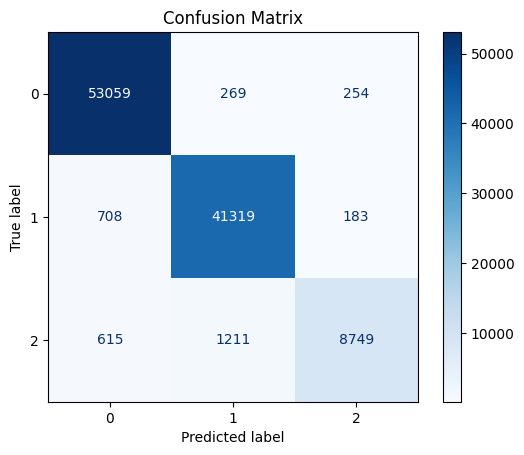

Accuracy: 0.9695
Precision: 0.9693
Recall: 0.9695
F1 Score: 0.9689
False Positive Rate: 0.0305
ROC-AUC: 0.9974
Training Time: 61.85 seconds

Cross-Validation Metrics:
Accuracy: 0.7353 ± 0.2477
Precision: 0.8517 ± 0.1001
Recall: 0.7353 ± 0.2477
F1 Score: 0.7390 ± 0.2282
ROC-AUC: 0.8955 ± 0.1106


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Data
X = data_f_cleaned_new.drop(columns=['label'])
y = data_f_cleaned_new['label']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Initialize Extra Trees Classifier
clf = ExtraTreesClassifier(random_state=42)

# Print Hyperparameters
print("Hyperparameters for Extra Trees Classifier:")
print(clf.get_params())

# Train the model
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Make predictions
y_pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pred_proba, multi_class='ovr')

# False Positive Rate
fpr = 1 - recall

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

# Cross-Validation
skf = StratifiedKFold(n_splits=5)
cv_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

for train_idx, val_idx in skf.split(X_scaled, y):
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    clf_cv = ExtraTreesClassifier(random_state=42)
    clf_cv.fit(X_train_cv, y_train_cv)

    val_predictions = clf_cv.predict(X_val_cv)
    val_pred_proba = clf_cv.predict_proba(X_val_cv)

    cv_metrics['accuracy'].append(accuracy_score(y_val_cv, val_predictions))
    cv_metrics['precision'].append(precision_score(y_val_cv, val_predictions, average='weighted'))
    cv_metrics['recall'].append(recall_score(y_val_cv, val_predictions, average='weighted'))
    cv_metrics['f1'].append(f1_score(y_val_cv, val_predictions, average='weighted'))
    cv_metrics['roc_auc'].append(roc_auc_score(pd.get_dummies(y_val_cv), val_pred_proba, multi_class='ovr'))

# Print Cross-Validation Metrics
print("\nCross-Validation Metrics:")
print(f"Accuracy: {np.mean(cv_metrics['accuracy']):.4f} ± {np.std(cv_metrics['accuracy']):.4f}")
print(f"Precision: {np.mean(cv_metrics['precision']):.4f} ± {np.std(cv_metrics['precision']):.4f}")
print(f"Recall: {np.mean(cv_metrics['recall']):.4f} ± {np.std(cv_metrics['recall']):.4f}")
print(f"F1 Score: {np.mean(cv_metrics['f1']):.4f} ± {np.std(cv_metrics['f1']):.4f}")
print(f"ROC-AUC: {np.mean(cv_metrics['roc_auc']):.4f} ± {np.std(cv_metrics['roc_auc']):.4f}")
